MOVIE RATING PREDICTION WITH PYTHON

IMPORTING LIBRARIES

In [139]:
#data analysis
import pandas as pd
import numpy as np
import random as rd

#data visualization
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

#machine learning algorithms (regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet #Linear Regression, Ridge Regression, Lasso Regression, Bayesian Ridge Regression, Elastic Net
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regressor
from sklearn.svm import SVR #Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Random Forest Regressor, Gradient Boost Regressor
from sklearn.neighbors import KNeighborsRegressor #k-Nearest Neighbors Regressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

LOADING DATASET

In [97]:
imdb_data = pd.read_csv('/content/IMDbMoviesIndia.csv', encoding='latin-1')
imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


DATA ANALYSIS

In [98]:
imdb_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [99]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


DATA CLEANING

In [100]:
#Checking the number of null values in the dataset
imdb_data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [101]:
#Finding rows with null values
nulls = imdb_data[imdb_data.iloc[:, 1:9].isna().all(axis=1)]
nulls

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271,Durga Rani Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,Main Hoon Kaun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,Mughal Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#Handling null values
imdb_data.dropna(subset=['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [103]:
imdb_data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [104]:
#Name column contains many names with typing errors. So we will take only the alphabets from those names.
imdb_data['Name'] = imdb_data['Name'].str.extract('([A-Za-z\s\'\-]+)')
imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [105]:
#We will also get rid of the brackets in the 'year' column for better analysis
imdb_data['Year'] = imdb_data['Year'].str.replace(r'[()]', '', regex=True).astype(int)
imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [106]:
#Converting duration to numeric form (getting rid of 'min')
imdb_data['Duration'].dtype
imdb_data['Duration'] = imdb_data['Duration'].astype(str)
imdb_data['Duration'] = imdb_data['Duration'].str.replace(r' min', '', regex=True)
imdb_data['Duration'] = pd.to_numeric(imdb_data['Duration'], errors='coerce')

In [107]:
imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [108]:
#Convert 'Votes' to numeric and replace the , to keep only numerical part
imdb_data['Votes'].dtype
imdb_data['Votes'].head()
imdb_data['Votes'] = imdb_data['Votes'].astype(str)
imdb_data['Votes'] = pd.to_numeric(imdb_data['Votes'].str.replace(',', ''), errors='coerce')
imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


BIVARIATE ANALYSIS

In [109]:
#Let's work on genres now. As we can see, there are movies that come under multiple genres
genres = imdb_data['Genre'].str.split(', ', expand=True)
genres

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
...,...,...,...
15493,Drama,None,None
15494,Biography,Drama,History
15503,Action,Crime,Drama
15505,Action,Drama,None


In [110]:
genre_count = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

for genre, count in sorted(genre_count.items()):
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [111]:
genres_db = imdb_data['Genre'].value_counts()
genres_db

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [112]:
genres_df = imdb_data['Genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_df.name = 'Genre'
df_separated = imdb_data.drop('Genre', axis=1).join(genres_df)
df_separated

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
1,Gadhvi,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
3,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
3,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Romance
5,Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy
5,Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Drama
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Drama
15505,Zulmi,1999,129,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action
15505,Zulmi,1999,129,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Drama
15508,Zulm-O-Sitam,1998,130,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,Action


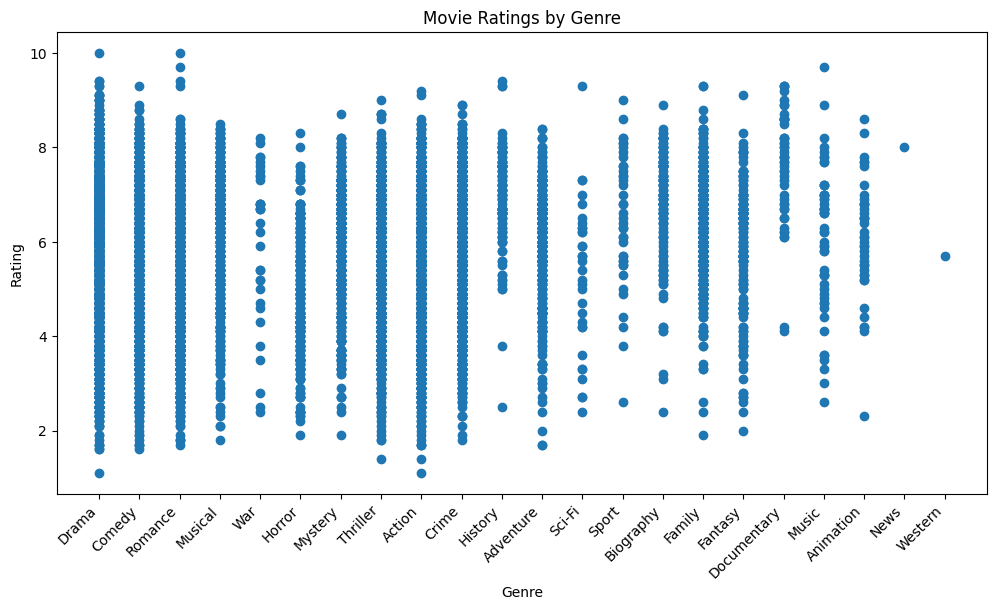

In [113]:
plt.figure(figsize=(12, 6))
plt.scatter(df_separated['Genre'], df_separated['Rating'])
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  #X-axis has been rotated by 45 degrees for better visibility
plt.show()

From the graph, it is clear that no matter what the genre is, the ratings are distributed quite evenly, except for a few exceptions. There are also a few outliers. We will also take a look at the average ratings per genre, just to be sure.

In [114]:
actor_melted_df = pd.melt(imdb_data, id_vars=['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director'], value_vars=['Actor 1', 'Actor 2', 'Actor 3'], var_name='Actor_Type', value_name='Actor')
actor_melted_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor_Type,Actor
0,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Actor 1,Rasika Dugal
1,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Actor 1,Prateik
2,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Actor 1,Bobby Deol
3,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Actor 1,Jimmy Sheirgill
4,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Actor 1,Yash Dave
...,...,...,...,...,...,...,...,...,...
16972,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Actor 3,Raaghavv Chanana
16973,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Actor 3,Manoj Bajpayee
16974,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Actor 3,Rajinikanth
16975,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Actor 3,Aruna Irani


In [115]:
average_ratings_per_actor = actor_melted_df.groupby('Actor')['Rating'].mean().reset_index()
average_ratings_per_actor

,Actor,Rating
0,A. Muthu,3.300000
1,A. Nairang,6.100000
2,A.H. Shore,6.200000
3,A.K. Hangal,6.828571
4,A.S. Ravindra Babu,4.800000
...,...,...
5036,Zoya Afroz,5.000000
5037,Zoya Hussain,7.566667
5038,Zubeida,6.200000
5039,Zuber K. Khan,6.000000


<ipython-input-116-726ec5b0a83b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Actor', y='Rating', data=average_ratings_per_actor, palette='viridis')


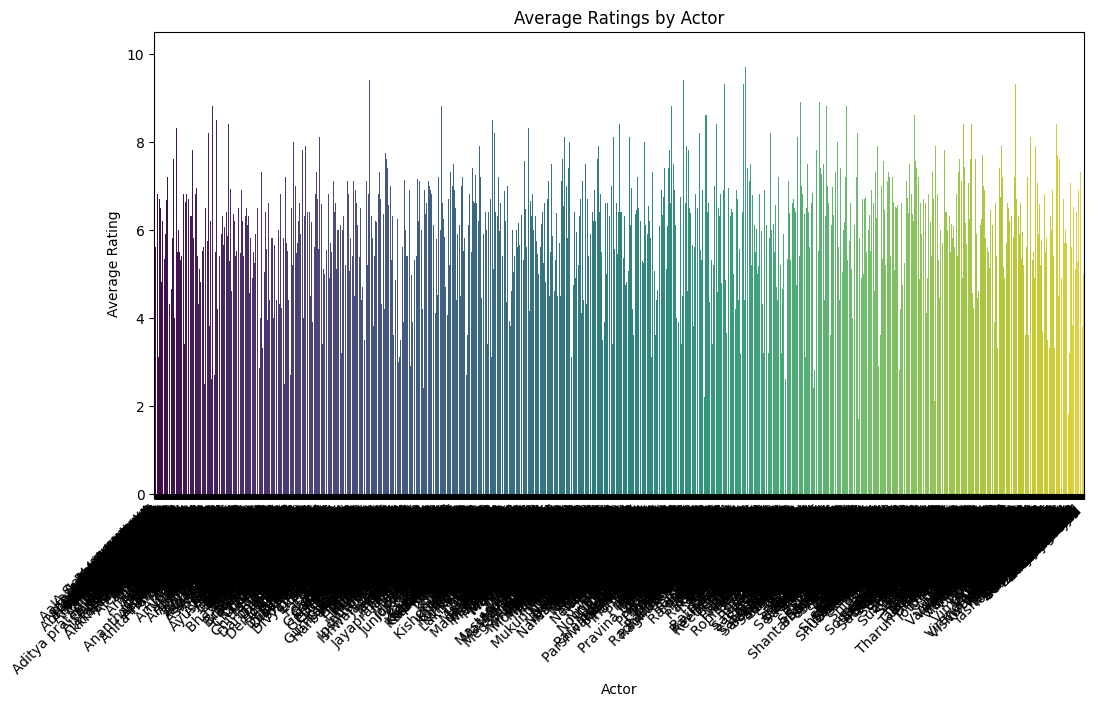

In [116]:
plt.figure(figsize=(12, 6))
sb.barplot(x='Actor', y='Rating', data=average_ratings_per_actor, palette='viridis')
plt.title('Average Ratings by Actor')
plt.xlabel('Actor')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [117]:
average_ratings_per_director = imdb_data.groupby('Director')['Rating'].mean().reset_index()
average_ratings_per_director

,Director,Rating
0,A. Bhimsingh,6.785714
1,A. Jagannathan,5.833333
2,A. Majid,5.700000
3,A. Muthu,3.000000
4,A. Salaam,5.575000
...,...,...
2426,Zia Sarhadi,6.366667
2427,Ziaullah Khan,5.600000
2428,Zoya Akhtar,6.800000
2429,Zubair Khan,5.400000


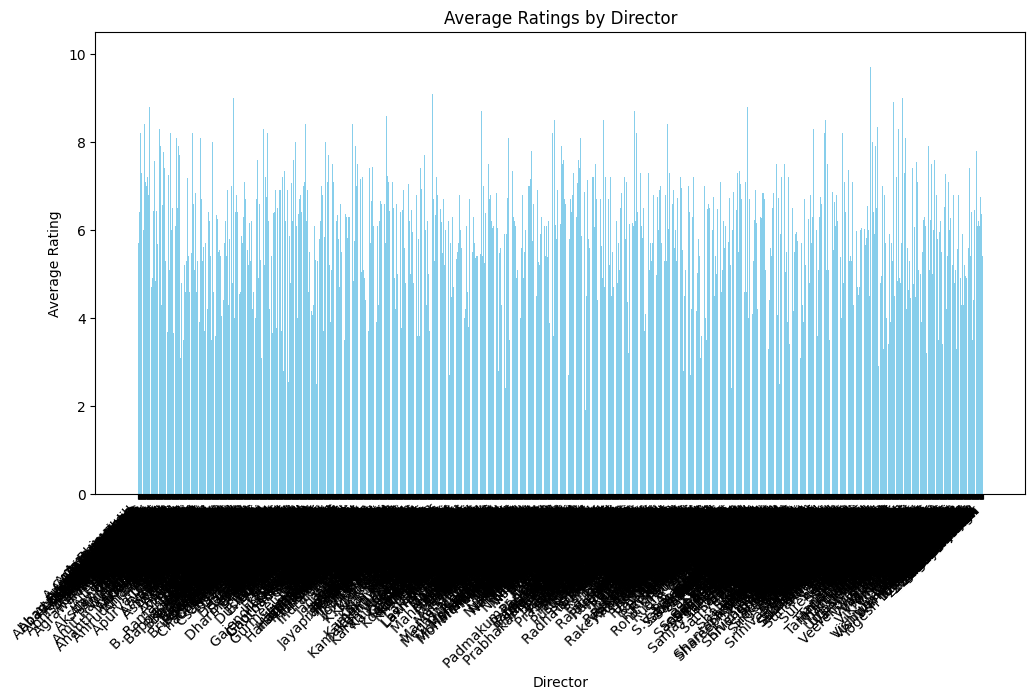

In [118]:
plt.figure(figsize=(12, 6))
plt.bar(average_ratings_per_director['Director'], average_ratings_per_director['Rating'], color='skyblue')
plt.title('Average Ratings by Director')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [119]:
average_ratings_per_genre = df_separated.groupby('Genre')['Rating'].mean().reset_index()
average_ratings_per_genre

,Genre,Rating
0,Action,5.520463
1,Adventure,5.879422
2,Animation,6.072500
3,Biography,6.737391
4,Comedy,5.751042
5,Crime,5.820114
6,Documentary,7.608333
7,Drama,6.056744
8,Family,6.323317
9,Fantasy,5.808219


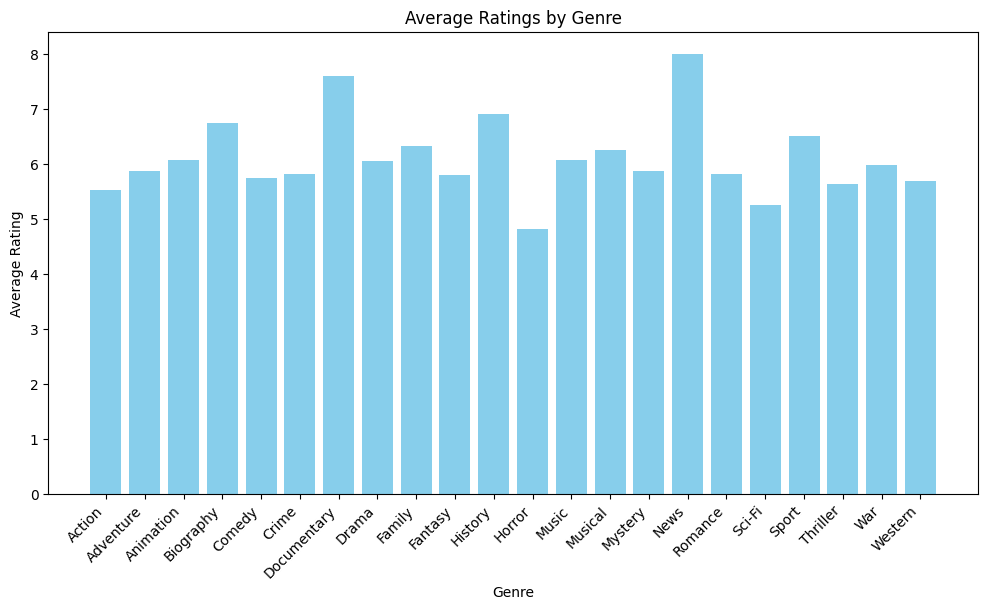

In [120]:
plt.figure(figsize=(12, 6))
plt.bar(average_ratings_per_genre['Genre'], average_ratings_per_genre['Rating'], color='skyblue')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [121]:
average_ratings_per_year = imdb_data.groupby('Year')['Rating'].mean().reset_index()
average_ratings_per_year

,Year,Rating
0,1931,5.750000
1,1932,6.000000
2,1933,6.200000
3,1934,5.600000
4,1935,5.700000
...,...,...
86,2017,6.012796
87,2018,6.150495
88,2019,6.265198
89,2020,6.123571


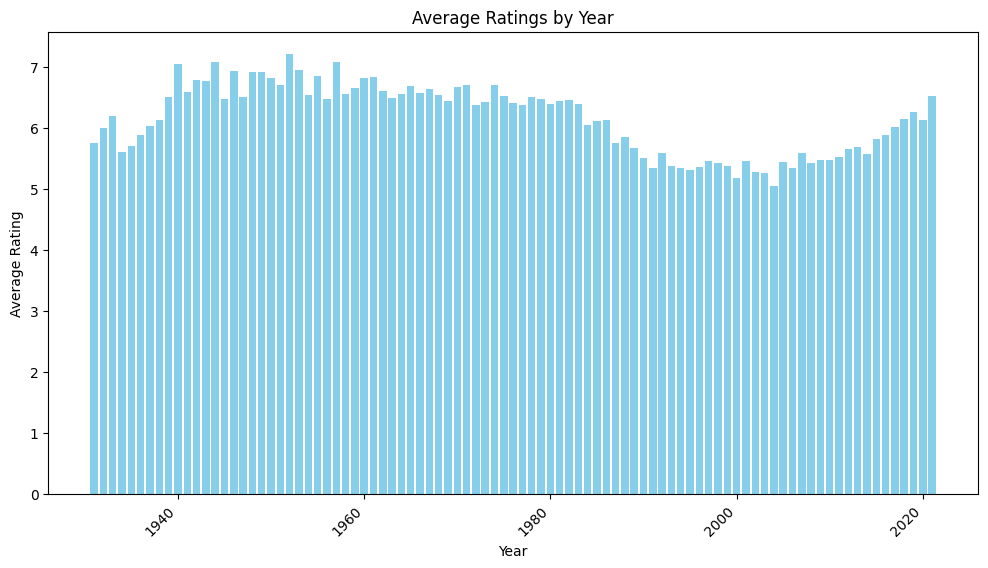

In [122]:
plt.figure(figsize=(12, 6))
plt.bar(average_ratings_per_year['Year'], average_ratings_per_year['Rating'], color='skyblue')
plt.title('Average Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [123]:
average_ratings_per_duration = df_separated.groupby('Duration')['Rating'].mean().reset_index()
average_ratings_per_duration

,Duration,Rating
0,21,7.800000
1,45,7.114286
2,46,3.100000
3,47,6.550000
4,48,7.380000
...,...,...
169,247,7.000000
170,250,5.200000
171,255,5.200000
172,300,5.600000


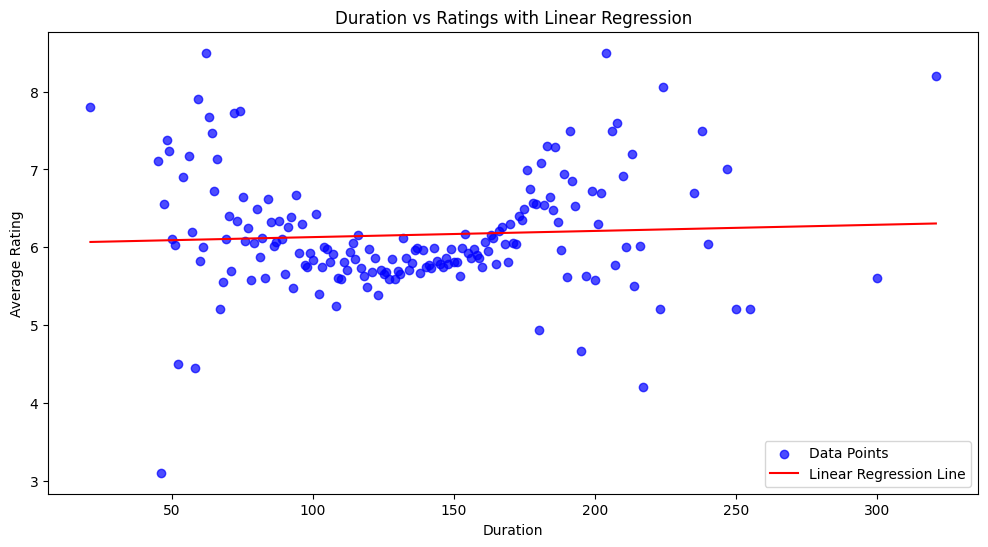

In [124]:
plt.figure(figsize=(12, 6))
plt.scatter(average_ratings_per_duration['Duration'], average_ratings_per_duration['Rating'], alpha=0.7, color='blue', label='Data Points')

#Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(average_ratings_per_duration['Duration'], average_ratings_per_duration['Rating'])
line = slope * average_ratings_per_duration['Duration'] + intercept
plt.plot(average_ratings_per_duration['Duration'], line, color='red', label='Linear Regression Line')

plt.title('Duration vs Ratings with Linear Regression')
plt.xlabel('Duration')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

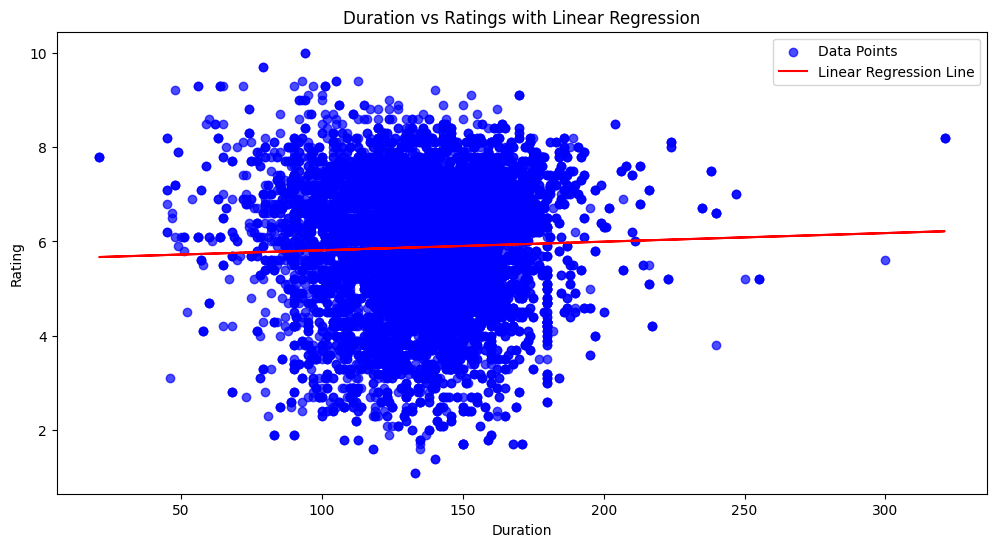

In [125]:
plt.figure(figsize=(12, 6))
plt.scatter(df_separated['Duration'], df_separated['Rating'], alpha=0.7, color='blue', label='Data Points')

slope, intercept, r_value, p_value, std_err = linregress(df_separated['Duration'], df_separated['Rating'])
line = slope * df_separated['Duration'] + intercept
plt.plot(df_separated['Duration'], line, color='red', label='Linear Regression Line')

plt.title('Duration vs Ratings with Linear Regression')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.legend()
plt.show()

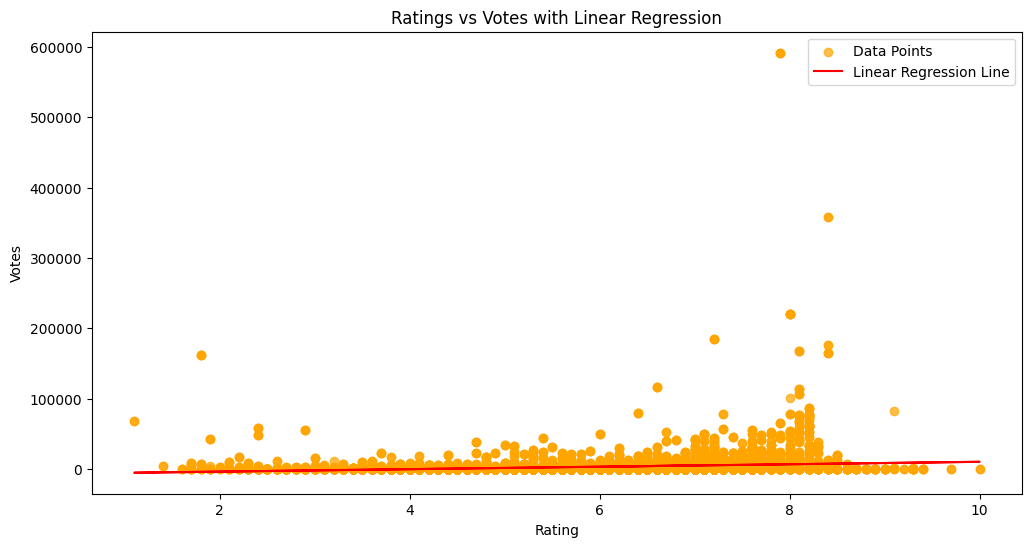

In [126]:
plt.figure(figsize=(12, 6))
plt.scatter(df_separated['Rating'], df_separated['Votes'], alpha=0.7, color='orange', label='Data Points')

slope, intercept, r_value, p_value, std_err = linregress(df_separated['Rating'], df_separated['Votes'])
line = slope * df_separated['Rating'] + intercept
plt.plot(df_separated['Rating'], line, color='red', label='Linear Regression Line')

plt.title('Ratings vs Votes with Linear Regression')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.legend()
plt.show()

In [127]:
df_separated

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
1,Gadhvi,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
3,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
3,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Romance
5,Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy
5,Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Drama
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Drama
15505,Zulmi,1999,129,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action
15505,Zulmi,1999,129,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Drama
15508,Zulm-O-Sitam,1998,130,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,Action


DATA PREPROCESSING

In [129]:
genre_mean_rating = imdb_data.groupby('Genre')['Rating'].transform('mean')
imdb_data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = imdb_data.groupby('Director')['Rating'].transform('mean')
imdb_data['Director_mean_rating'] = director_mean_rating

actor1_mean_rating = imdb_data.groupby('Actor 1')['Rating'].transform('mean')
imdb_data['Actor1_mean_rating'] = actor1_mean_rating

actor2_mean_rating = imdb_data.groupby('Actor 2')['Rating'].transform('mean')
imdb_data['Actor2_mean_rating'] = actor2_mean_rating

actor3_mean_rating = imdb_data.groupby('Actor 3')['Rating'].transform('mean')
imdb_data['Actor3_mean_rating'] = actor3_mean_rating

imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_mean_rating,Actor1_mean_rating,Actor2_mean_rating,Actor3_mean_rating
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.100000,6.725000,6.100000,5.850000
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.950000,7.250000,4.157143,5.823077,5.954545
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.270000,6.307692,5.800000,6.050000
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.225000,5.481707,4.640000,5.737500


In [132]:
X = imdb_data[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_mean_rating','Actor1_mean_rating', 'Actor2_mean_rating', 'Actor3_mean_rating']]
y = imdb_data['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

MODEL BUILDING AND EVALUATION

In [134]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'k-Nearest Neighbors Regression': KNeighborsRegressor()
}

In [140]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': model_name, 'MSE': mse, 'R2': r2})

In [141]:
result_df = pd.DataFrame(results).sort_values(by='MSE')
print("Results:")
print(result_df)

Results:
                            Model       MSE        R2
7        Random Forest Regression  0.342160  0.815223
8    Gradient Boosting Regression  0.345435  0.813454
3       Bayesian Ridge Regression  0.424538  0.770736
1                Ridge Regression  0.424543  0.770733
0               Linear Regression  0.424544  0.770733
5        Decision Tree Regression  0.684373  0.630417
4          Elastic Net Regression  0.799640  0.568169
9  k-Nearest Neighbors Regression  1.363409  0.263716
2                Lasso Regression  1.416603  0.234990
6                             SVR  1.772780  0.042643
